In [1]:
## starting model refinement and testing in this notebook 

# Import our dependencies
import pandas as pd
import os 


# Read in our ramen data
num_all_homes_df_transformed = pd.read_csv("../Resources/Predictions_Resources/trans_with_state1HOT_Zhvi_city.csv")
# Read in our ramen data
num_all_homes_df_transformed
# # Print out the Country value counts
# country_counts = ramen_df.Country.value_counts()
# country_counts

,Unnamed: 0,Unnamed: 0.1,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,...,41,42,43,44,45,46,47,48,49,50
0,0,0,500592.0,506267.0,508485.0,510606.0,513148.0,518144.0,521337.0,524195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,624755.0,630004.0,636285.0,640154.0,646316.0,650327.0,653364.0,654803.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,128913.0,128924.0,129169.0,129307.0,129793.0,130181.0,130661.0,131035.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,280994.0,283177.0,284850.0,286799.0,287944.0,288968.0,289628.0,290446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,119832.0,120418.0,121067.0,121616.0,122124.0,122762.0,123581.0,124480.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,17611,17611,89296.8,94795.6,95548.8,96248.0,96660.6,96530.4,96697.6,96949.4,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
17612,17612,17612,31564.8,31502.2,31394.2,31423.0,31495.6,31615.2,31755.6,31772.4,...,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0
17613,17613,17613,82662.8,82745.6,83045.4,83562.4,84306.0,85142.4,85776.2,86188.8,...,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0
17614,17614,17614,64912.2,65107.6,65355.4,65525.6,65801.2,66059.8,66410.4,66686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
num_all_homes_df_transformed.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [3]:
# Define features set -- using 2020-03 as y for now 
X = num_all_homes_df_transformed.copy()
X = X.drop("2020-03-31", axis=1)
X.head()

,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,...,41,42,43,44,45,46,47,48,49,50
0,500592.0,506267.0,508485.0,510606.0,513148.0,518144.0,521337.0,524195.0,524801.0,522607.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,624755.0,630004.0,636285.0,640154.0,646316.0,650327.0,653364.0,654803.0,652556.0,651129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128913.0,128924.0,129169.0,129307.0,129793.0,130181.0,130661.0,131035.0,131564.0,132139.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,280994.0,283177.0,284850.0,286799.0,287944.0,288968.0,289628.0,290446.0,290953.0,291373.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,119832.0,120418.0,121067.0,121616.0,122124.0,122762.0,123581.0,124480.0,125401.0,126236.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Define target vector y 
y = num_all_homes_df_transformed["2020-03-31"].values.reshape(-1, 1)
y[:5]

array([[652307.],
       [752508.],
       [191907.],
       [249152.],
       [187718.]])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# ## instead of train test will just compare x and y with cross-validation 

# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X)
# Scaling data
X_scaled = X_scaler.transform(X)

In [7]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled,y)


LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np
import os

housing_predictions = lin_reg.predict(X_scaled)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

92.09060202062831

In [ ]:
# try test split on lin_reg 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
print(len(y_test))
print(len(X_test_scaled))


4404
4404


In [68]:
import numpy as np
print(np.mean(X_train_scaled[:,0]))
print(np.std(X_test_scaled[:,0]))

-7.905675307049252e-17
1.0


In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

housing_predictions = lin_reg.predict(X_test_scaled)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

189.16605665915696

In [61]:
## try unscaled X 
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred=lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

189.16605665997625

In [62]:
## running again with scaling on all x 
scaler = StandardScaler()
X_scaler = scaler.fit(X)
X_train_scaled_all = X_scaler.transform(X_train)
X_test_scaled_all = X_scaler.transform(X_test)

In [63]:
## train and test on all scaled
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled_all,y_train)

housing_predictions = lin_reg.predict(X_test_scaled_all)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

189.16605665911538

In [64]:
deliv_3_lin_reg_predictions_df= pd.DataFrame(housing_predictions)
deliv_3_lin_reg_predictions_df

,0
0,489080.458268
1,204769.271958
2,193671.189050
3,98842.217016
4,250083.039478
...,...
4399,213817.123323
4400,165431.800292
4401,107648.215688
4402,187595.983734


In [65]:

## saving best model predicitions 
deliv_3_lin_reg_predictions_df.to_csv('../Resources/Predictions_Resources/deliv_3_lin_reg_predictions_df.csv',encoding='utf-8')

In [59]:
## try unscaled 

from sklearn.metrics import mean_squared_error
import numpy as np
import os

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
housing_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

### almost same score 


189.16605665997625

In [20]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, housing_predictions)
lin_mae

41.13568477133998

In [ ]:
## attempting 2nd degree polynomial to get more accurate model 

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([500592., 506267., 508485., ...,      0.,      0.,      0.])

In [13]:
from sklearn.model_selection import train_test_split
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([-63.95128989]),
 array([[-1.85466783e-03, -1.19187807e-03,  8.28282354e-04, ...,
         -3.30034135e-07, -1.88917184e-08, -2.44164290e-07]]))

In [20]:
y_new =lin_reg.predict(X_test_poly)
lin_mse = mean_squared_error(y_test, y_new)
lin_rmse = np.sqrt(lin_mse)
lin_rmse



460056.3618792642

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
## trying decision tree regressor 

from sklearn.tree import DecisionTreeRegressor
## create instance 
tree_reg = DecisionTreeRegressor(random_state=42)

# fit to data 
tree_reg.fit(X_scaled, y)

DecisionTreeRegressor(random_state=42)

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_scaled, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [25]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [11966.20051227  6675.47791599 30866.04848896  3729.25549327
  3003.70643098  5423.15212747  4563.97611918  9356.66503541
 20468.52859016 15628.28668993]
Mean: 11168.129740362268
Standard deviation: 8468.26389775039


In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=6)
forest_reg.fit(X_scaled, y)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(max_depth=6, n_estimators=200, random_state=42)

In [30]:
lin_scores = cross_val_score(forest_reg, X_scaled, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/mod

Scores: [ 8266.55419556  7135.14328544 44611.00348781 10854.94023144
  3451.62034523  6623.51595675  6990.41684426  4857.46182819
 14699.65341704 15747.46694851]
Mean: 12323.777654024258
Standard deviation: 11405.133171132844


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

In [27]:

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=220),
        'max_depth': randint(low=1, high=6),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_scaled, y)

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/mod

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd42cd46b10>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd42ccd1310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd42cd46690>},
                   random_state=42, scoring='neg_mean_squared_error')

In [28]:
## results of random cv of random forest regressor 

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

26773.6176455192 {'max_depth': 4, 'max_features': 93, 'n_estimators': 15}
36731.14816460029 {'max_depth': 3, 'max_features': 72, 'n_estimators': 189}
20329.94073662826 {'max_depth': 5, 'max_features': 103, 'n_estimators': 122}
37200.518584876954 {'max_depth': 3, 'max_features': 215, 'n_estimators': 75}
37214.986243737316 {'max_depth': 3, 'max_features': 88, 'n_estimators': 117}
22412.517706609313 {'max_depth': 4, 'max_features': 104, 'n_estimators': 152}
37798.39691910116 {'max_depth': 3, 'max_features': 150, 'n_estimators': 53}
82410.33971399242 {'max_depth': 2, 'max_features': 88, 'n_estimators': 158}
82235.38885115329 {'max_depth': 2, 'max_features': 192, 'n_estimators': 188}
18086.92137581827 {'max_depth': 5, 'max_features': 161, 'n_estimators': 58}


In [29]:
## taking best model from CV 

final_model = rnd_search.best_estimator_
final_model 

RandomForestRegressor(max_depth=5, max_features=161, n_estimators=58,
                      random_state=42)

In [30]:
final_predictions = final_model.predict(X_scaled)

final_mse = mean_squared_error(y, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

7650.22307764699

In [86]:
final_model.estimators_[57]

DecisionTreeRegressor(max_depth=5, max_features=161, random_state=1608637542)

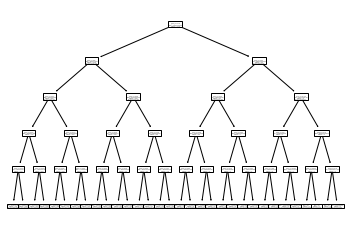

In [97]:

from sklearn import tree

tree.plot_tree(final_model.estimators_[57]);

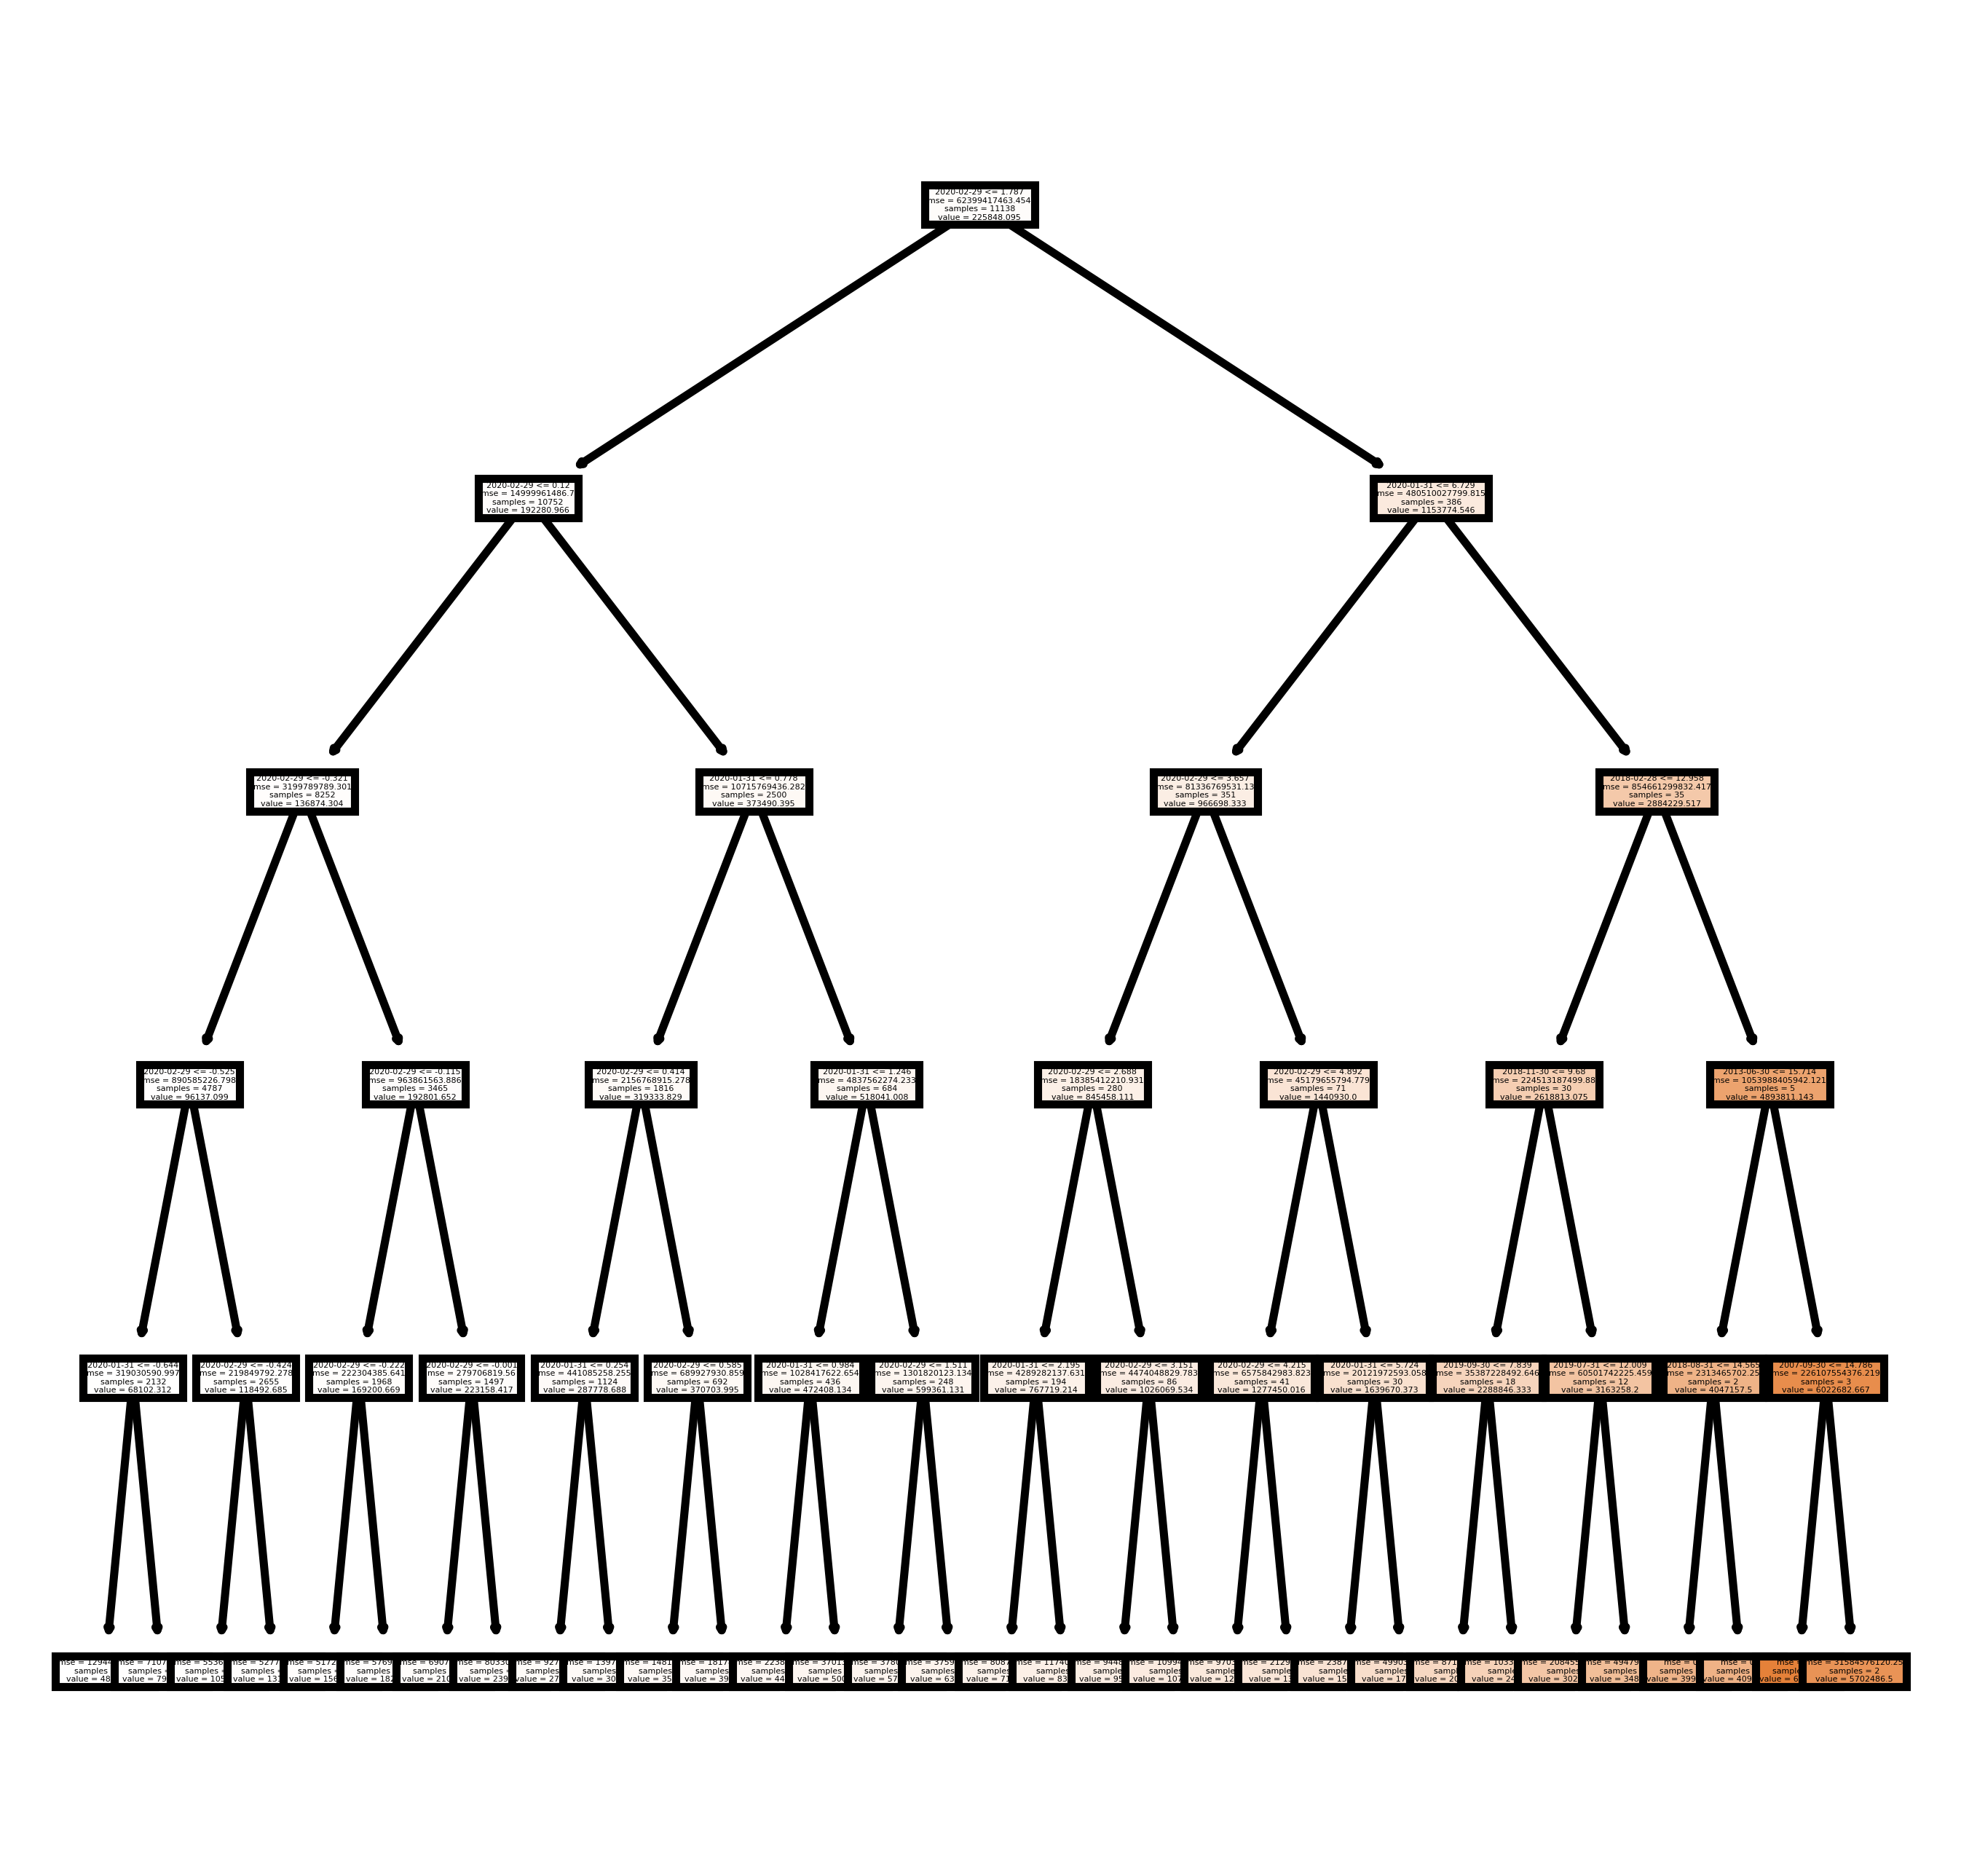

In [100]:
import matplotlib.pyplot as plt
fn=X.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(final_model.estimators_[57],
               feature_names = fn, 
               filled = True);
fig.savefig('rf_individualtree.png')

In [23]:
from sklearn import tree


from sklearn.tree import export_graphviz


# from graphviz import graphviz
cv_tree = final_model.estimators_[0]
dot_data = tree.export_graphviz(cv_tree,
#                     feature_names=<list of feature names>,  
#                   class_names=<list of class names>, 
                               filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = export_graphviz.Source(dot_data)
graph

NameError: name 'final_model' is not defined

In [39]:
deliv_3_Random_forest_Rnd_search_predictions_df= pd.DataFrame(final_predictions)

In [40]:
deliv_3_Random_forest_Rnd_search_predictions_df

,0
0,661332.734598
1,750657.391899
2,190524.707530
3,248329.814774
4,186642.611449
...,...
17611,83059.775557
17612,49695.105781
17613,128340.379417
17614,81804.942205


In [41]:

## saving best model predicitions 
deliv_3_Random_forest_Rnd_search_predictions_df.to_csv('../Resources/Predictions_Resources/deliv_3_Random_forest_Rnd_search_predictions_df.csv',encoding='utf-8')

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
## increasing amount of trees to 100

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=4)
forest_reg.fit(X_train_scaled_all, y_train)
y_pred = forest_reg.predict(X_test_scaled_all)
for_mse = mean_squared_error(y_test, y_pred)
for_rmse = np.sqrt(for_mse)
for_rmse

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


34391.74505166398

In [67]:
## increasing depth  of trees to 6 

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=6)
forest_reg.fit(X_train_scaled_all, y_train)
y_pred = forest_reg.predict(X_test_scaled_all)
for_mse = mean_squared_error(y_test, y_pred)
for_rmse = np.sqrt(for_mse)
for_rmse

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


29988.196323155338

In [71]:

## try warm start to keep trees as loop works through more trees until validation error does not improve 
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=5, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train_scaled_all, y_train)
    y_pred = gbrt.predict(X_test_scaled_all)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [73]:
val_error = mean_squared_error(y_test, y_pred)
gbrt_rmse = np.sqrt(val_error)
gbrt_rmse

23197.385521441935

In [74]:
## trying deeper trees

## try warm start to keep trees as loop works through more trees until validation error does not improve 
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=8, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train_scaled_all, y_train)
    y_pred = gbrt.predict(X_test_scaled_all)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [75]:
val_error = mean_squared_error(y_test, y_pred)
gbrt_rmse = np.sqrt(val_error)
gbrt_rmse

24739.5549552785

In [76]:
print(" number of estimators :",gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)


gbrt_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",gbrt_MAE)

 number of estimators : 122
Minimum validation MSE: 612044466.694629
mse : 612045579.3852451
rmse : 24739.5549552785
MAE : 1480.9797459173826


In [81]:

# model = <SomeDecisionTreeEnsemble>()
# model.fit(X, y)
# some_tree = model.extimators_[0]
# dot_data = tree.export_graphviz(some_tree, 
#                   feature_names=<list of feature names>,  
#                   class_names=<list of class names>,  
#                   filled=True, rounded=True,  
#                   special_characters=True,
#                    out_file=None,
#                            )
# graph = graphviz.Source(dot_data)
# graph


from sklearn import tree
gbrt_tree = gbrt.estimators_[0]
dot_data = tree.export_graphviz(gbrt_tree,
                               filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

AttributeError: 'GradientBoostingRegressor' object has no attribute 'extimators_'

In [91]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [93]:
## trying deeper trees

## try warm start to keep trees as loop works through more trees until validation error does not improve 
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=8, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 300):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train_scaled, y_train)
    y_pred = gbrt.predict(X_test_scaled)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/robertrustia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [94]:
print(" number of estimators :",gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

gbrt_mse = mean_squared_error(y_test,y_pred)
gbrt_rmse=np.sqrt(gbrt_mse)
print("mse :",gbrt_mse)
print("rmse :",gbrt_rmse)


gbrt_MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",gbrt_MAE)

 number of estimators : 122
Minimum validation MSE: 612044307.5440907
mse : 612045433.8777081
rmse : 24739.552014491048
MAE : 1480.9995073450234


In [101]:

# from sklearn import tree

# tree.plot_tree(gbrt.estimators_[57]);